In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
cwd = os.getcwd()

api_path = os.path.join(cwd, '..', 'tools')
sys.path.append(api_path)

In [3]:
import numpy as np
import random

from matplotlib import pyplot as plt

import torch, torch.nn as nn
import torch.nn.functional as F


from sir_ais_sampling import (run_experiments_gaussians,
                              sir_correlated_dynamics)

from distributions import (Target, 
                           Gaussian_mixture, 
                           IndependentNormal,
                           init_independent_normal)

# SIR

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
dim_arr = [30*(i + 1) for i in range(9)]  
var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
num_points_in_chain = 10000
strategy_mean = 'chain'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 1
n_steps = 60000
N = 10
method_params = {'n_steps': n_steps, 'N': N}
random_seed = 42
method = 'sir_independent' 
print_results = True
results_independent = run_experiments_gaussians(dim_arr,  
                                                scale_proposal, 
                                                scale_target, 
                                                num_points_in_chain, 
                                                strategy_mean,
                                                device,
                                                batch_size,
                                                method_params,
                                                random_seed,
                                                method,
                                                print_results)

------------------
mode = target
dim = 30
mean estimation of variance = 1.0061782598495483
mean estimation of mean = 0.01278663519769907
mean estimation of ess = 0.2676267626762676
------
dim = 60
mean estimation of variance = 0.8921854496002197
mean estimation of mean = 0.003313018474727869
mean estimation of ess = 0.0333033303330333
------
dim = 90
mean estimation of variance = 0.7449384331703186
mean estimation of mean = -0.005054965149611235
mean estimation of ess = 0.008500850085008501
------
dim = 120
mean estimation of variance = 3.863663611269885e-09
mean estimation of mean = -0.043878164142370224
mean estimation of ess = 0.0
------
dim = 150
mean estimation of variance = 3.916035939965923e-09
mean estimation of mean = -0.013066168874502182
mean estimation of ess = 0.0
------
dim = 180
mean estimation of variance = 3.838620088458811e-09
mean estimation of mean = -0.03700427711009979
mean estimation of ess = 0.0
------
dim = 210
mean estimation of variance = 3.790504354839186e-0

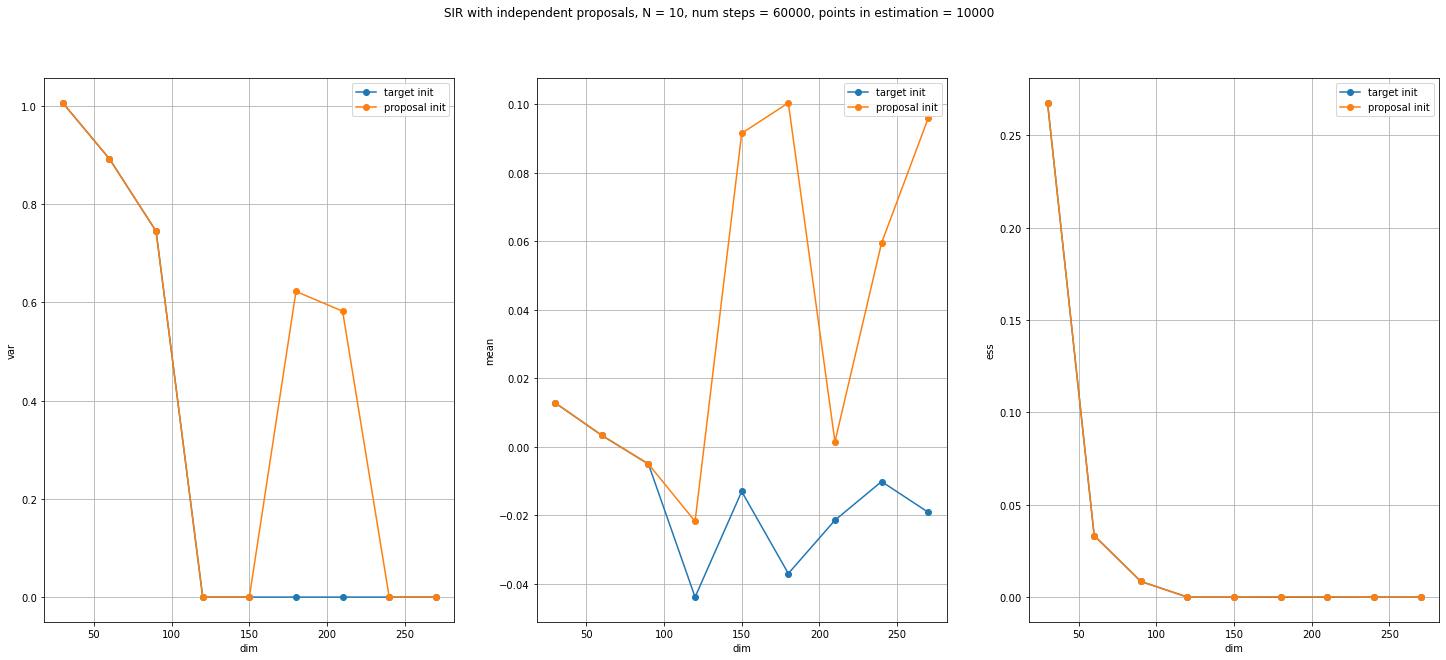

In [33]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25, 10))
name = f'SIR with independent proposals, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}'
fig.suptitle(name)

#axs[0].axhline(var_target, label='real', color='black')
axs[0].set_xlabel('dim')
axs[0].set_ylabel('var')

#axs[1].axhline(0.0, label='real', color='black')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('mean')

#axs[2].axhline(0.0, label='real', color='black')
axs[2].set_xlabel('dim')
axs[2].set_ylabel('ess')

modes_to_plot = ['mean_var', 'mean_loc', 'ess']
for i, mode in enumerate(modes_to_plot):
    axs[i].plot(dim_arr, results_independent['target'][mode], label='target init', marker='o')
    axs[i].plot(dim_arr, results_independent['proposal'][mode], label='proposal init', marker='o')

for ax in axs:
    ax.grid()
    ax.legend()

plt.show()

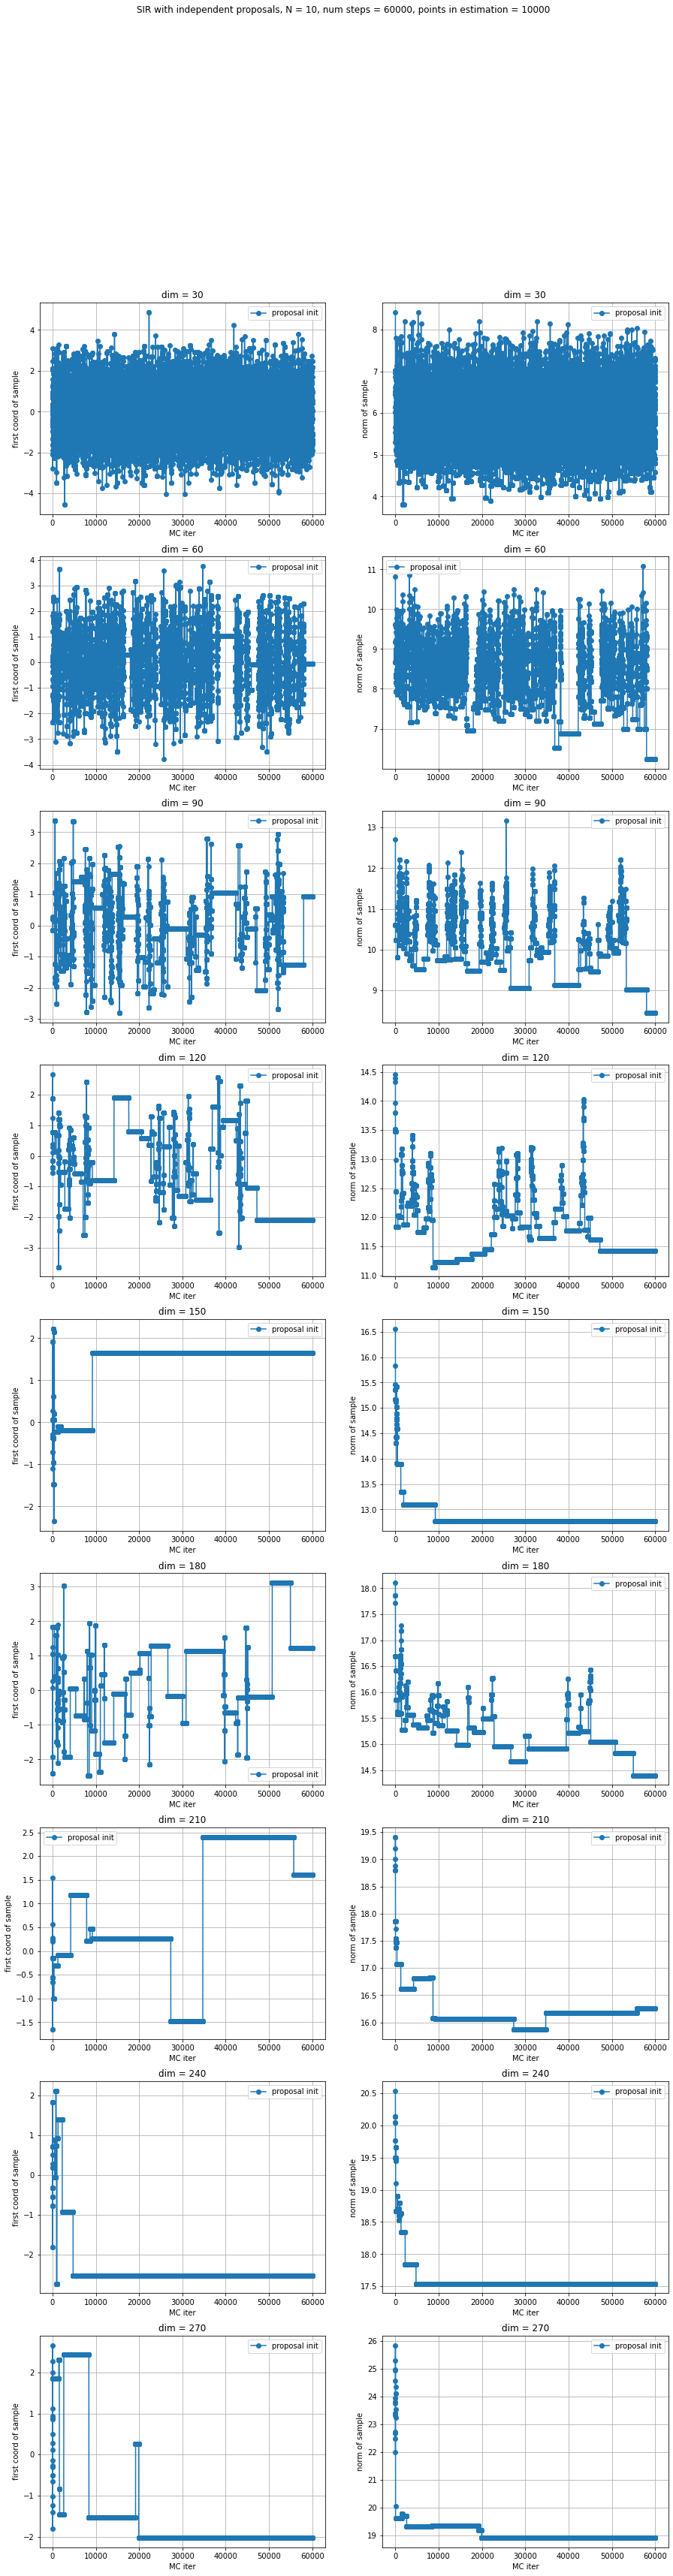

In [36]:
fig, axs = plt.subplots(ncols=2, nrows=len(dim_arr), figsize=(15, 55))
name = f'SIR with independent proposals, N = {N}, num steps = {n_steps}, points in estimation = {num_points_in_chain}'
fig.suptitle(name)

for i, dim in enumerate(dim_arr):
    axs[i][0].set_xlabel('MC iter')
    axs[i][0].set_ylabel('first coord of sample')
    #axs[i][0].plot(np.arange(len(dict_results['target']['history_first'][i])), 
    #               dict_results['target']['history_first'][i], 
    #               label=f'target init', marker='o')
    axs[i][0].plot(np.arange(len(results_independent['proposal']['history_first'][i])), 
                   results_independent['proposal']['history_first'][i], 
                   label=f'proposal init', marker='o')
    axs[i][0].set_title(f'dim = {dim}')
    axs[i][0].grid()
    axs[i][0].legend()

    axs[i][1].set_xlabel('MC iter')
    axs[i][1].set_ylabel('norm of sample')
    #axs[i][1].plot(np.arange(len(dict_results['target']['history_norm'][i])), 
    #               dict_results['target']['history_norm'][i], 
    #               label='target init', marker='o')
    axs[i][1].plot(np.arange(len(results_independent['proposal']['history_norm'][i])), 
                   results_independent['proposal']['history_norm'][i], 
                   label=f'proposal init', marker='o')
    axs[i][1].set_title(f'dim = {dim}')
    axs[i][1].grid()
    axs[i][1].legend()


plt.show()    

In [24]:
dim_arr = [30*(i + 1) for i in range(10)]  
var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
num_points_in_chain = 10000
strategy_mean = 'chain'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 1
n_steps = 60000
c = 1.0
N = 10
method_params = {'n_steps': n_steps, 'scale_proposal': scale_proposal, 'N': 10, 'c': c}
random_seed = 42
method = 'sir_correlated' 
print_results = True
results_corr = run_experiments_gaussians(dim_arr,  
                                         scale_proposal, 
                                         scale_target, 
                                         num_points_in_chain, 
                                         strategy_mean,
                                         device,
                                         batch_size,
                                         method_params,
                                         random_seed,
                                         method,
                                         print_results)

------------------
mode = target
dim = 30
mean estimation of variance = 0.986962616443634
mean estimation of mean = 0.013300567865371704
mean estimation of ess = 0.8476847684768477
------
dim = 60
mean estimation of variance = 0.9791516661643982
mean estimation of mean = 0.010116007179021835
mean estimation of ess = 0.845084508450845
------
dim = 90
mean estimation of variance = 0.9897880554199219
mean estimation of mean = 0.003406813833862543
mean estimation of ess = 0.8475847584758476
------
dim = 120
mean estimation of variance = 0.9745680689811707
mean estimation of mean = 0.010864599607884884
mean estimation of ess = 0.8420842084208421
------
dim = 150
mean estimation of variance = 0.9693143963813782
mean estimation of mean = 0.015320410951972008
mean estimation of ess = 0.8452845284528453
------
dim = 180
mean estimation of variance = 0.9584763646125793
mean estimation of mean = 0.011881235986948013
mean estimation of ess = 0.8444844484448445
------
dim = 210
mean estimation of v

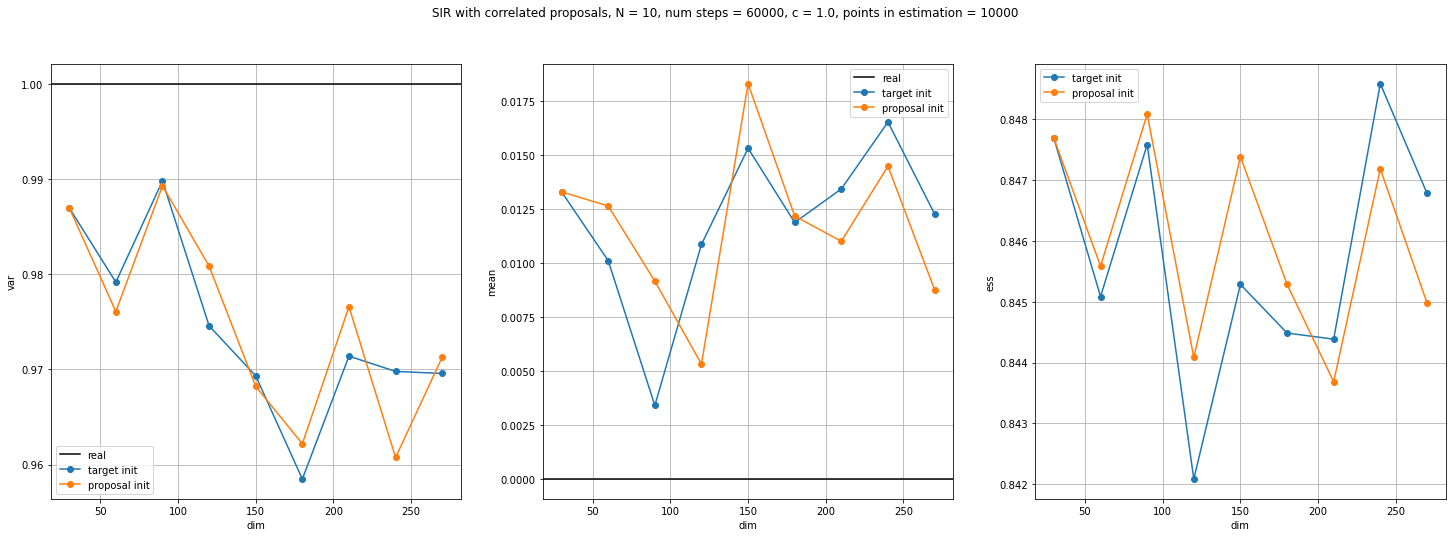

In [25]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25, 8))
name = f'SIR with сorrelated proposals, N = {N}, num steps = {n_steps}, c = {c}, points in estimation = {num_points_in_chain}'
fig.suptitle(name)

axs[0].axhline(var_target, label='real', color='black')
axs[0].set_xlabel('dim')
axs[0].set_ylabel('var')

axs[1].axhline(0.0, label='real', color='black')
axs[1].set_xlabel('dim')
axs[1].set_ylabel('mean')

axs[2].set_xlabel('dim')
axs[2].set_ylabel('ess')

modes_to_plot = ['mean_var', 'mean_loc', 'ess']
for i, mode in enumerate(modes_to_plot):
    axs[i].plot(dim_arr[:-1], results_corr['target'][mode][:-1], label='target init', marker='o')
    axs[i].plot(dim_arr[:-1], results_corr['proposal'][mode][:-1], label='proposal init', marker='o')

for ax in axs:
    ax.grid()
    ax.legend()

plt.show()

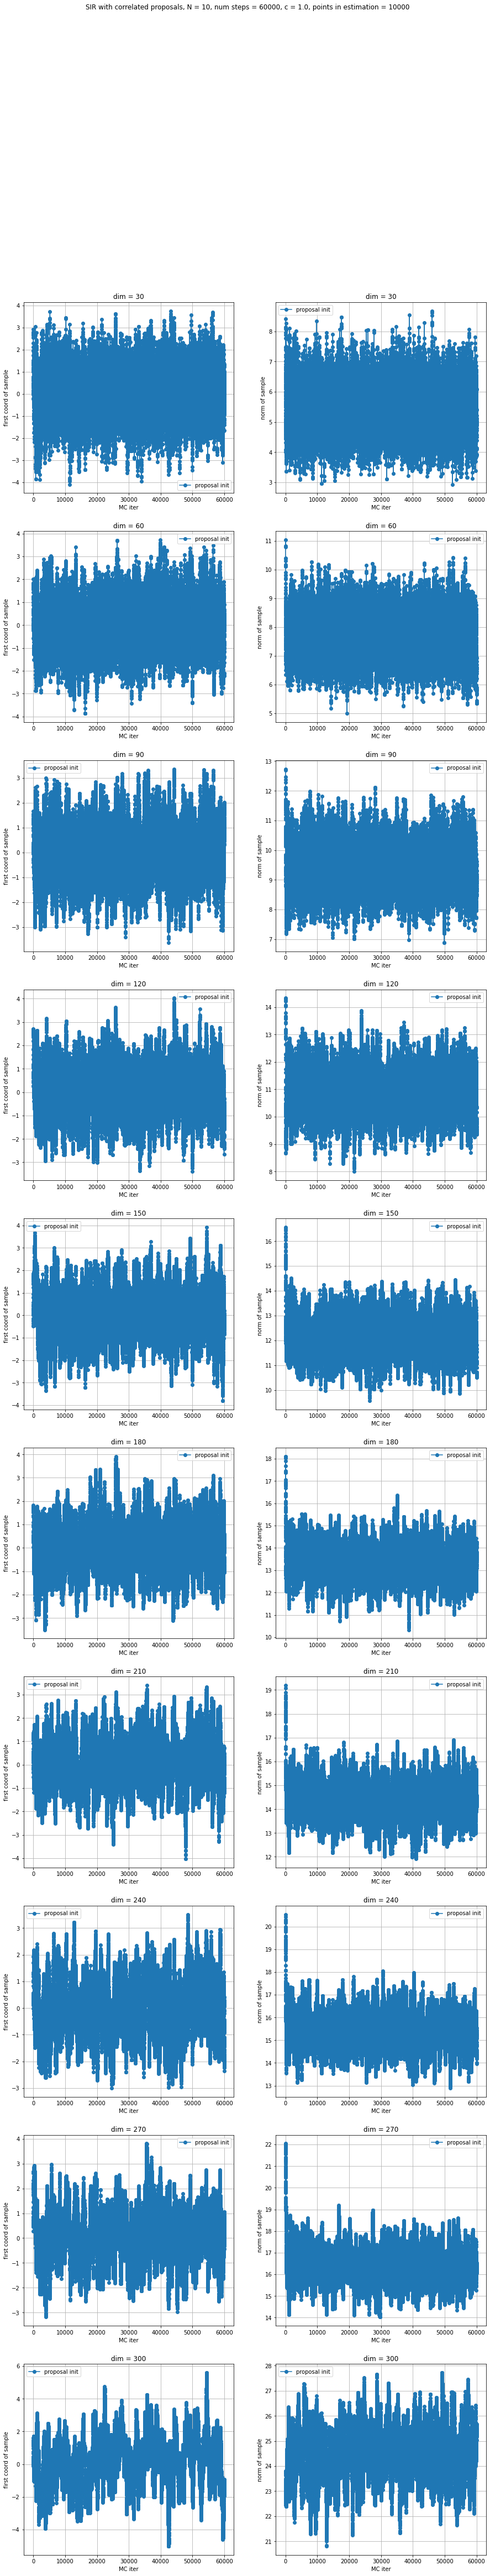

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=10, figsize=(15, 75))
name = f'SIR with сorrelated proposals, N = {N}, num steps = {n_steps}, c = {c}, points in estimation = {num_points_in_chain}'
fig.suptitle(name)

for i, dim in enumerate(dim_arr):
    axs[i][0].set_xlabel('MC iter')
    axs[i][0].set_ylabel('first coord of sample')
    axs[i][0].plot(np.arange(len(results_corr['proposal']['history_first'][i])), 
                   results_corr['proposal']['history_first'][i], 
                   label=f'proposal init', marker='o')
    axs[i][0].set_title(f'dim = {dim}')
    axs[i][0].grid()
    axs[i][0].legend()

    axs[i][1].set_xlabel('MC iter')
    axs[i][1].set_ylabel('norm of sample')
    axs[i][1].plot(np.arange(len(results_corr['proposal']['history_norm'][i])), 
                   results_corr['proposal']['history_norm'][i], 
                   label='proposal init', marker='o')
    axs[i][1].set_title(f'dim = {dim}')
    axs[i][1].grid()
    axs[i][1].legend()


plt.show()    

In [4]:
dim_arr = [30*(i + 1) for i in range(10)]  
var_proposal = 2.0
var_target = 1.0
scale_proposal = var_proposal ** 0.5
scale_target = var_target ** 0.5
num_points_in_chain = 10000
strategy_mean = 'chain'
device = 'cpu'
batch_size = 10
n_steps = 30000
c = 1.0
N = 10
method_params = {'n_steps': n_steps, 'scale_proposal': scale_proposal, 'N': 10, 'c': c}
random_seed = 42
method = 'sir_correlated' 
print_results = True
results_corr = run_experiments_gaussians(dim_arr,  
                                         scale_proposal, 
                                         scale_target, 
                                         num_points_in_chain, 
                                         strategy_mean,
                                         device,
                                         batch_size,
                                         method_params,
                                         random_seed,
                                         method,
                                         print_results)

------------------
mode = target
dim = 30
mean estimation of variance = 0.9999545812606812
mean estimation of mean = 0.0006337745580822229
mean estimation of ess = 0.8512051205120512
------
dim = 60
mean estimation of variance = 0.9934698343276978
mean estimation of mean = 0.0014841973315924406
mean estimation of ess = 0.8499649964996501
------
dim = 90
mean estimation of variance = 0.995296061038971
mean estimation of mean = -0.0018702051602303982
mean estimation of ess = 0.8497849784978498
------
dim = 120
mean estimation of variance = 0.9786173105239868
mean estimation of mean = -0.0013981913216412067
mean estimation of ess = 0.8508350835083508
------
dim = 150
mean estimation of variance = 0.9845097064971924
mean estimation of mean = 0.0014699888415634632
mean estimation of ess = 0.8501750175017502
------
dim = 180
mean estimation of variance = 0.9754686951637268
mean estimation of mean = 0.0032223621383309364
mean estimation of ess = 0.8485648564856486
------
dim = 210
mean estima